**About Dataset**

**Description:**

This dataset contains laboratory and demographic data for 615 individuals, focusing on blood donors and patients with Hepatitis C. It consists of 14 attributes that provide a mix of clinical and demographic information.

The dataset is used to analyze it's attributes to discern patterns, especially in the context of and Hepatitis C diagnosis using a Machine Learning Model.

**Acknowledgements:**
This dataset has been referred from Kaggle.

**Objectives:**

- Understanding the distribution of these variables among the population in the study
- Build a Machine Learning Model to predict whether a person is diagnosed with Hepatitis c or not

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

style.use("fivethirtyeight")

Data Collection, statistical analysis and preprocessing

In [38]:
hepatitis_df=pd.read_csv('./HepatitisCdata.csv')

In [39]:
hepatitis_df.head()


,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [40]:
print(hepatitis_df.isnull().sum())


Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64


In [41]:
hepatitis_df['ALB'].fillna(hepatitis_df['ALB'].mean(), inplace=True)
hepatitis_df['ALP'].fillna(hepatitis_df['ALP'].mean(), inplace=True)
hepatitis_df['CHOL'].fillna(hepatitis_df['CHOL'].mean(), inplace=True)
hepatitis_df['PROT'].fillna(hepatitis_df['PROT'].mean(), inplace=True)
hepatitis_df['ALT'].fillna(hepatitis_df['ALT'].mean(), inplace=True)
hepatitis_df = hepatitis_df.drop('Unnamed: 0', axis=1)

print(hepatitis_df.isnull().sum())


Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64


In [42]:
hepatitis_df['Category'] = hepatitis_df['Category'].replace({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0, '1=Hepatitis': 1, '2=Fibrosis': 1, '3=Cirrhosis': 1})

hepatitis_df['Sex'] = hepatitis_df['Sex'].replace({'m': 0, 'f': 1})


In [43]:
hepatitis_df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


Counting categorical value

In [45]:
# Value counts of categorical variables
print(hepatitis_df['Category'].value_counts())
print(hepatitis_df['Sex'].value_counts())

0    540
1     75
Name: Category, dtype: int64
0    377
1    238
Name: Sex, dtype: int64


In [46]:
col=['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT']

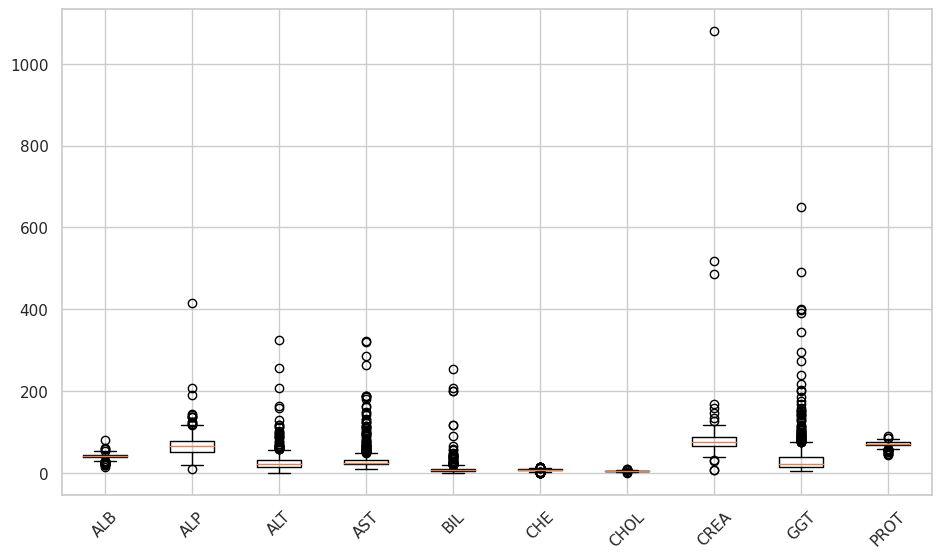

In [47]:
import matplotlib.pyplot as plt

# create a list of the columns to plot
columns_to_plot = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# create a box plot for each column
plt.figure(figsize=(10,6))
plt.boxplot(hepatitis_df[columns_to_plot].values, labels=columns_to_plot, showfliers=True)
plt.xticks(rotation=45)
plt.show()


Understanding the Outliers before scaling

In [49]:
q_low = hepatitis_df[col].quantile(0.01)
q_hi  = hepatitis_df[col].quantile(0.99)

df_outliers = hepatitis_df[(hepatitis_df[col] < q_low) | (hepatitis_df[col] > q_hi)]
outlier_percentage = (df_outliers.sum() / len(df_outliers)) * 100
print(outlier_percentage)


Category      0.000000
Age         103.089431
Sex           0.000000
ALB          88.829268
ALP         249.382114
ALT         223.723577
AST         300.227642
BIL         195.300813
CHE          19.108943
CHOL         13.222764
CREA        471.544715
GGT         490.926829
PROT        152.943089
dtype: float64


Scaling with Robust Scaler object

In [50]:
from sklearn.preprocessing import RobustScaler

# Create a RobustScaler object
robust_scaler = RobustScaler()

# Define the columns to be scaled using RobustScaler
cols_to_scale = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# Scale the selected columns using RobustScaler
hepatitis_df[cols_to_scale] = robust_scaler.fit_transform(hepatitis_df[cols_to_scale])


Outliers after scaling

In [51]:
q_low = hepatitis_df[col].quantile(0.01)
q_hi  = hepatitis_df[col].quantile(0.99)

df_outliers = hepatitis_df[(df[col] < q_low) | (hepatitis_df[col] > q_hi)]
outlier_percentage = (df_outliers.sum() / len(df_outliers)) * 100
print(outlier_percentage)


Category      0.000000
Age         103.089431
Sex           0.000000
ALB           0.040650
ALP           3.701887
ALT          10.292243
AST          21.351176
BIL          30.486427
CHE           0.115138
CHOL          0.790912
CREA         14.107627
GGT          17.872905
PROT         -1.871251
dtype: float64


Statistical analysis after scaling

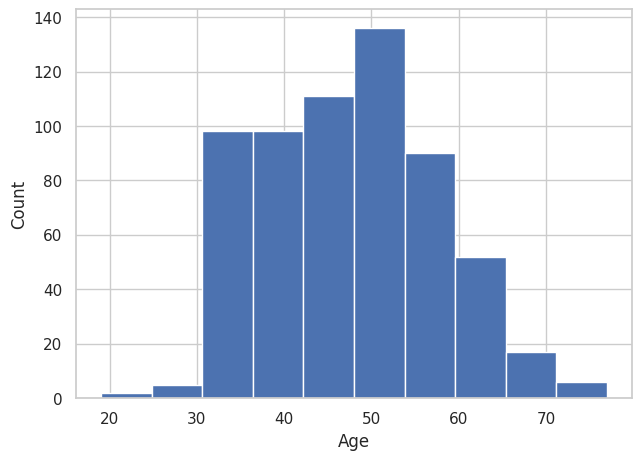

In [55]:
import matplotlib.pyplot as plt

plt.hist(hepatitis_df['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


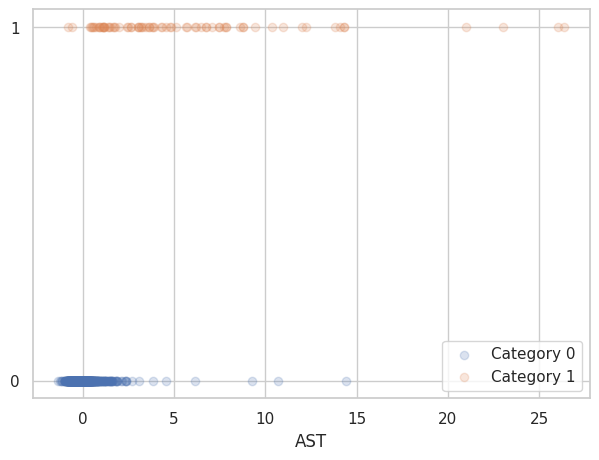

In [56]:
# filter data by category 0 or 1
df_cat0 = hepatitis_df[hepatitis_df['Category']==0]
df_cat1 = hepatitis_df[hepatitis_df['Category']==1]

# plot the scatter plot for category 0 and 1 separately
plt.scatter(df_cat0['AST'], np.zeros_like(df_cat0['AST']), alpha=0.2, label='Category 0')
plt.scatter(df_cat1['AST'], np.zeros_like(df_cat1['AST'])+1, alpha=0.2, label='Category 1')
plt.xlabel('AST')
plt.yticks([0,1])
plt.legend()
plt.show()


Total Suspected Patients : 540 
Total Healthy Patients : 75 


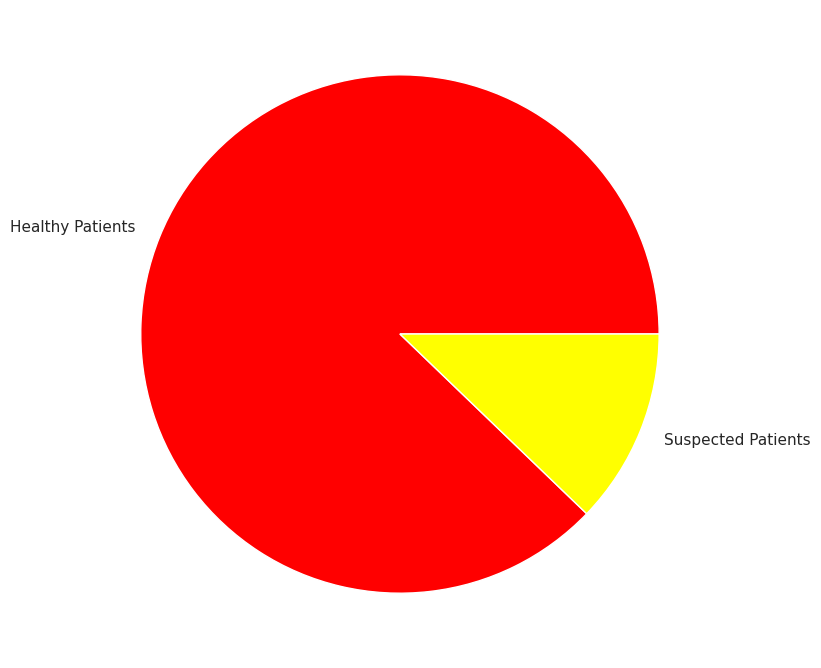

In [57]:
print ('Total Suspected Patients : {} '.format(hepatitis_df.Category.value_counts()[0]))
print ('Total Healthy Patients : {} '.format(hepatitis_df.Category.value_counts()[1]))
fig, ax = plt.subplots(figsize=(8,8))

plt.pie(x=hepatitis_df["Category"].value_counts(),
        colors=["red","yellow"],
        labels=["Healthy Patients","Suspected Patients"],
        )

plt.show()

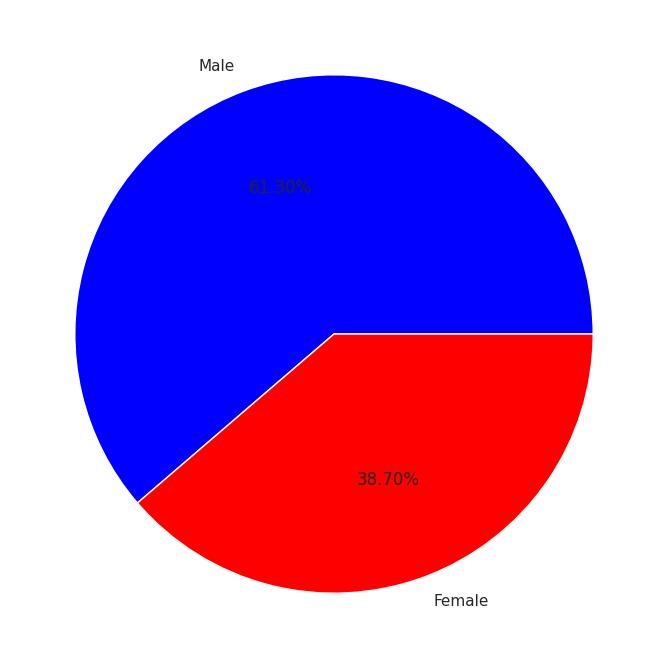

In [58]:
fig, ax = plt.subplots(figsize=(8,8))
plt.pie(x=hepatitis_df["Sex"].value_counts(),
        colors=["blue","red"],
        labels=["Male","Female"],
        autopct="%1.2f%%",
        )
plt.show()

understanding the correlation matrix

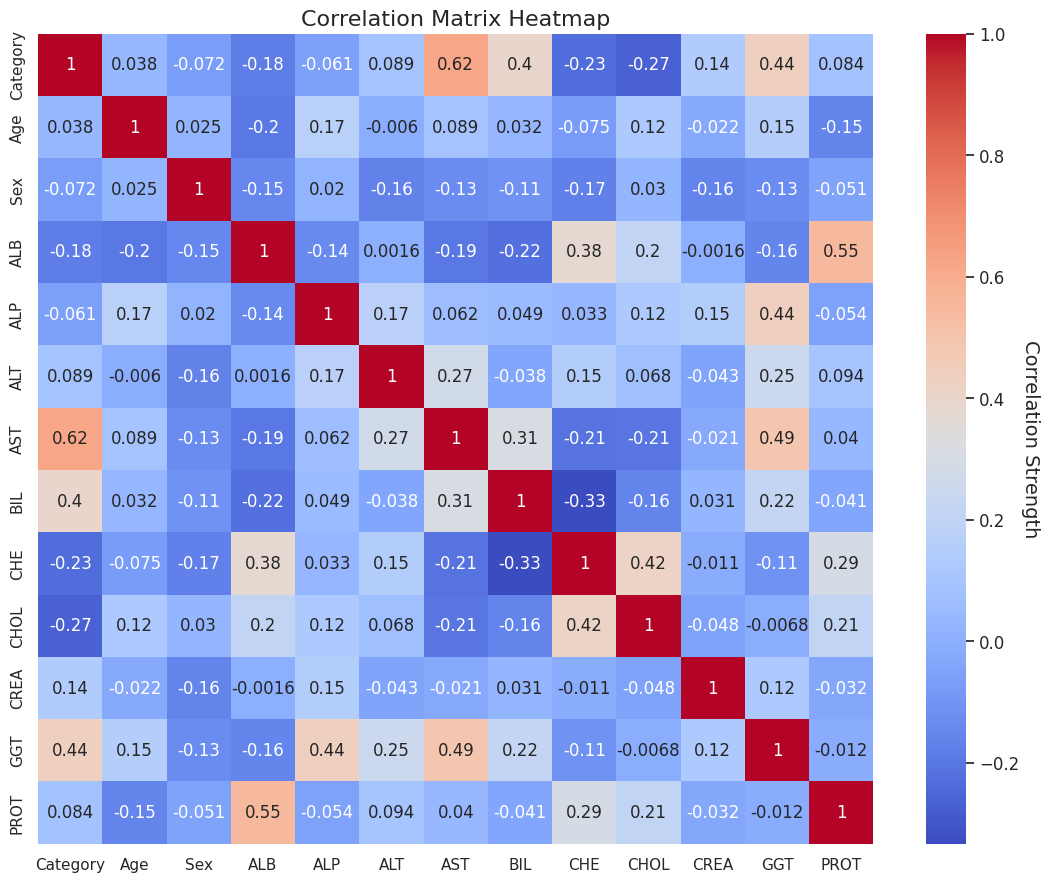

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
correlation_matrix = hepatitis_df.corr()
fig, ax = plt.subplots(figsize=(12, 10))
plt.title("Correlation Matrix Heatmap", fontsize=16)
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 12}, cmap='coolwarm', ax=ax)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Correlation Strength', rotation=270, fontsize=14, labelpad=15)
plt.show()


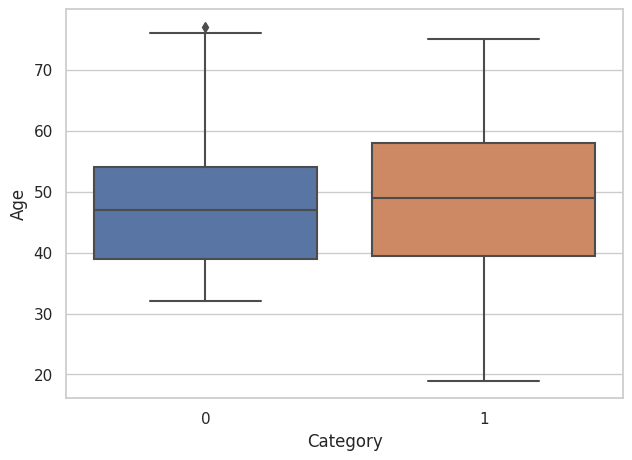

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Category", y="Age", data=hepatitis_df)
plt.show()


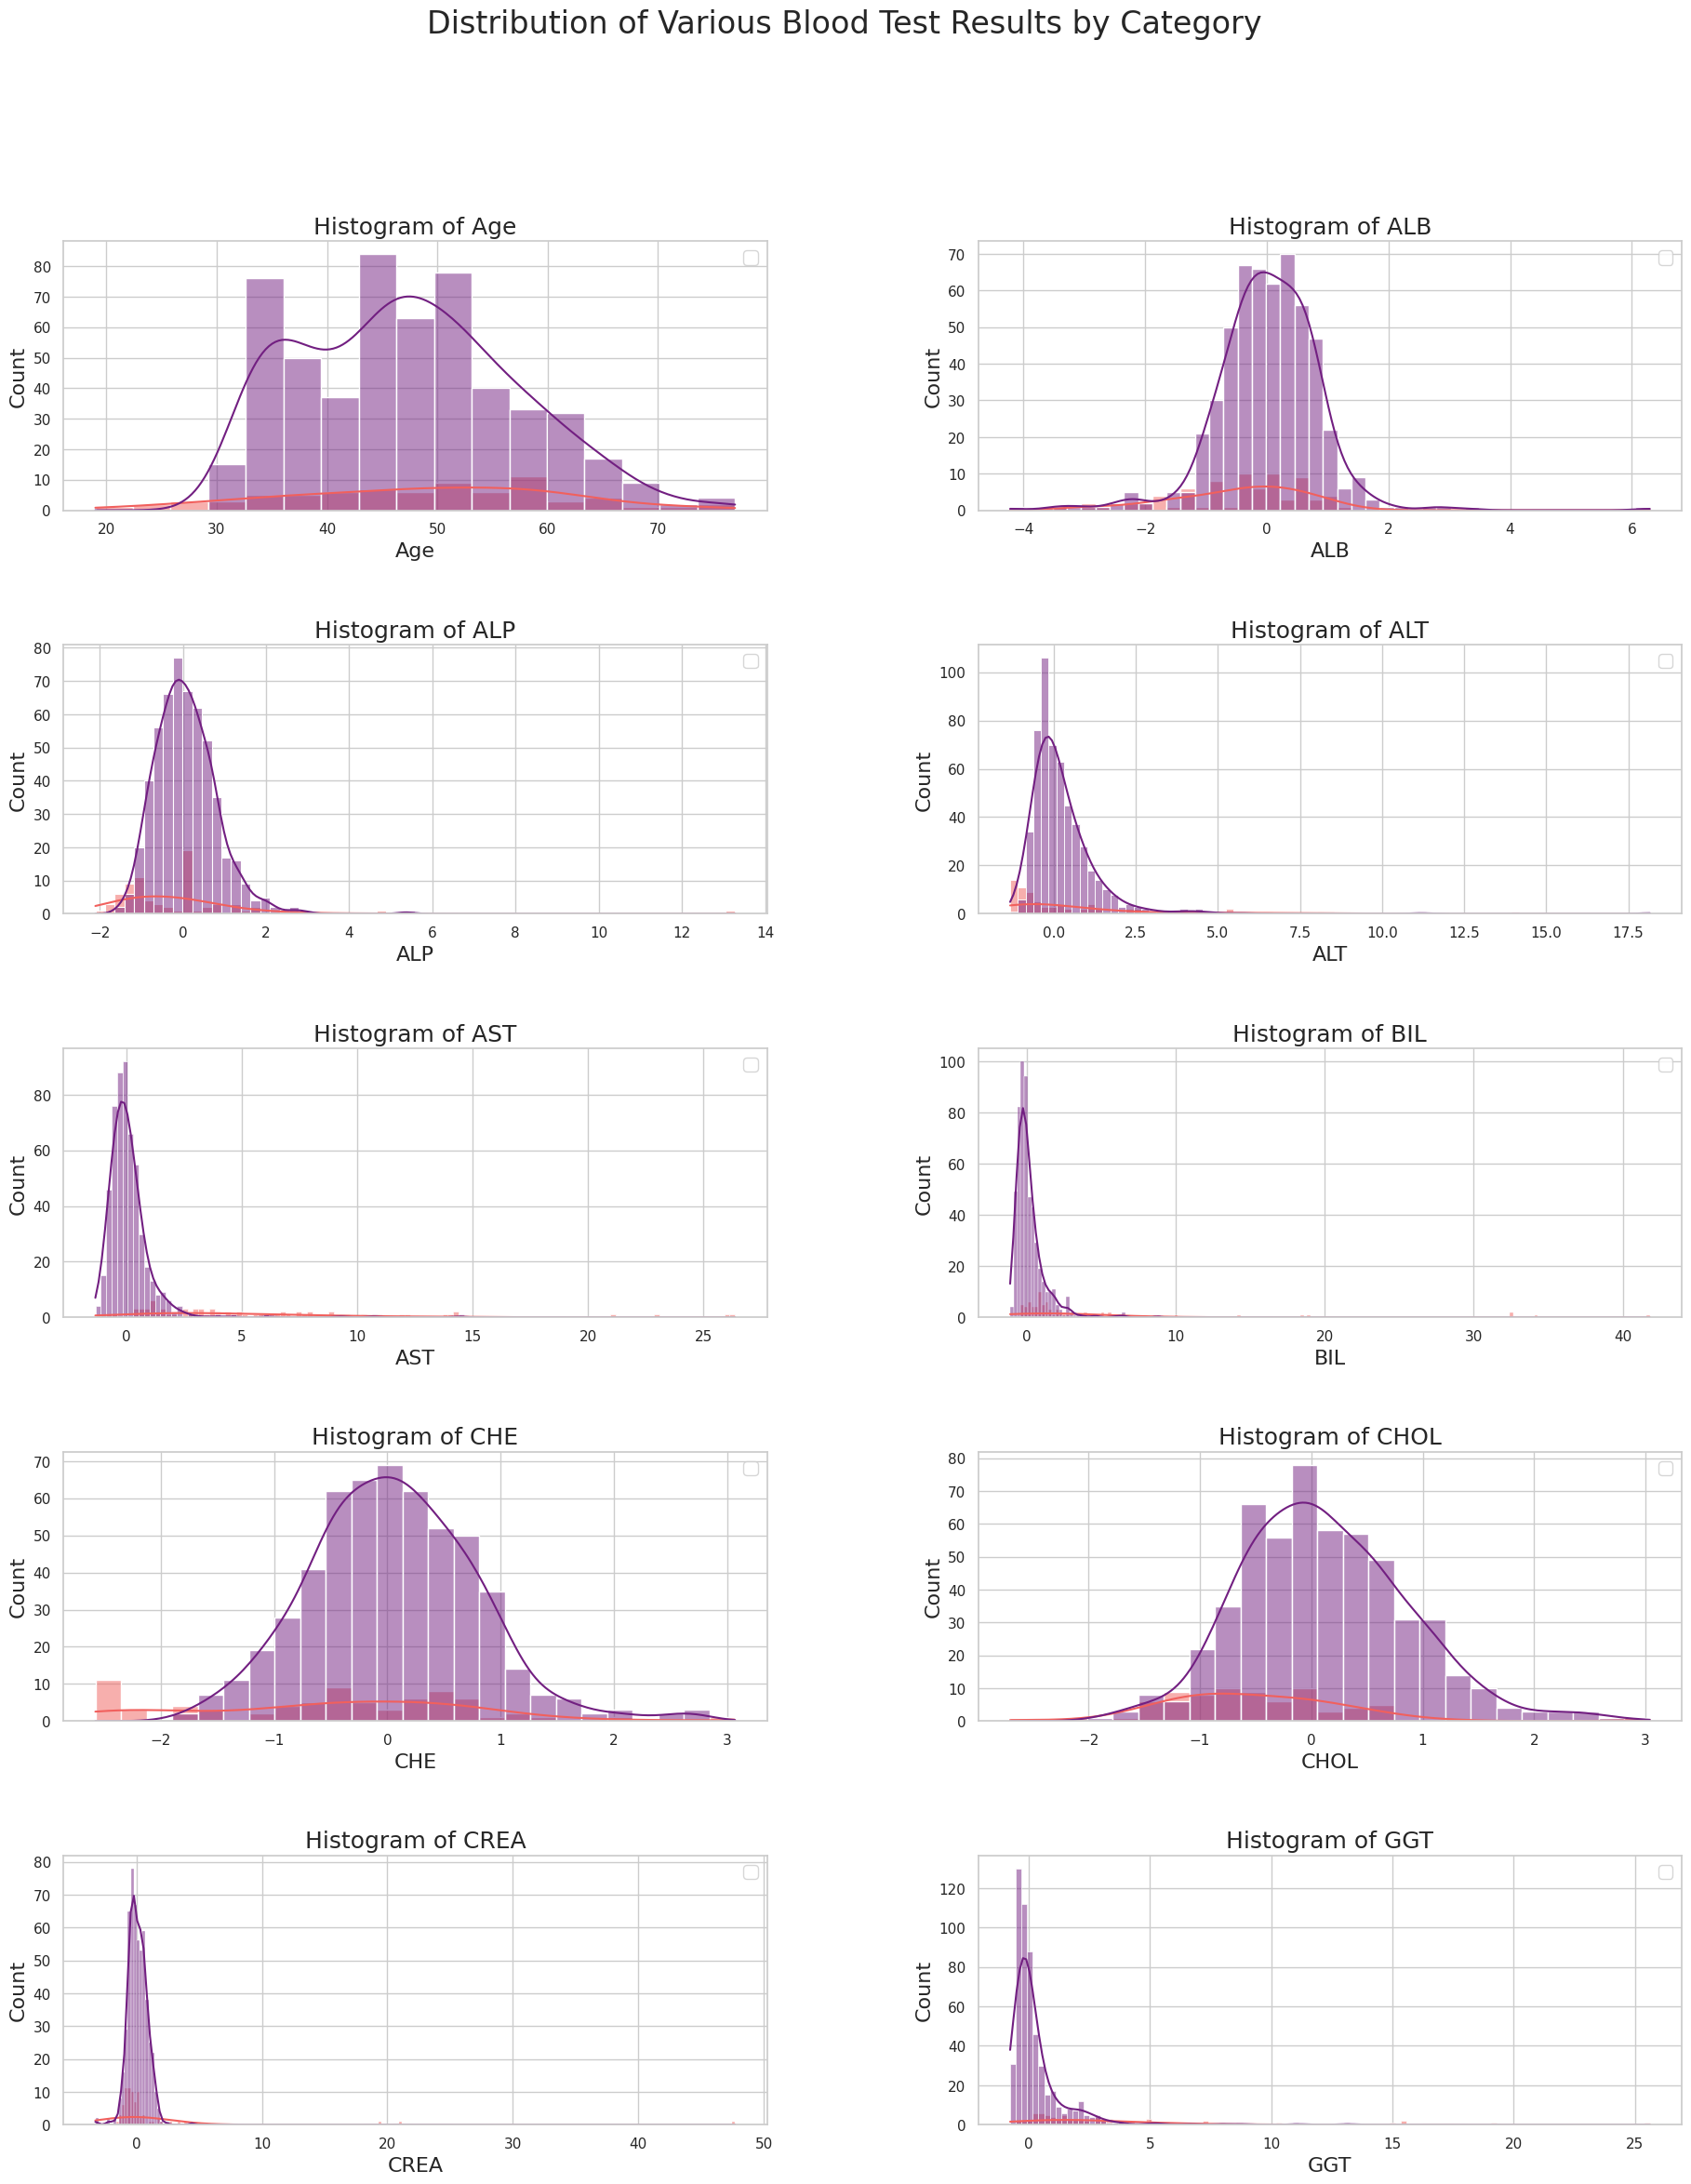

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axes = plt.subplots(5, 2, figsize=(20, 25))
axes = axes.flatten()

# Define the columns to plot
columns = ["Age", "ALB", "ALP", "ALT", "AST", "BIL", "CHE", "CHOL", "CREA", "GGT"]

# Loop over each column and plot a histogram with multiple categories
for i, col in enumerate(columns):
    sns.histplot(x=hepatitis_df[col], hue=hepatitis_df["Category"], kde=True, palette="magma", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=16)  # increase x-axis label font size
    axes[i].set_ylabel("Count", fontsize=16)  # increase y-axis label font size
    axes[i].set_title(f"Histogram of {col}", fontsize=18)  # increase title font size
    axes[i].legend(fontsize=14)  # increase legend font size

# Add a main title to the figure
fig.suptitle("Distribution of Various Blood Test Results by Category", fontsize=24)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # add more spacing between subplots



Training test split on the dataset

In [62]:
from sklearn.model_selection import train_test_split

X = hepatitis_df.drop("Category", axis=1)
y = hepatitis_df["Category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Models Building and training
And hyperperimeter tuning

In [63]:
import warnings
import joblib

# define a list of models to train and their corresponding hyperparameters to tune
models = [
    {
        "name": "Logistic Regression",
        "estimator": LogisticRegression(),
        "hyperparameters": {
            "penalty": ["l2"],
            "C": [0.01, 0.1, 1, 10],
            "max_iter": [500]
        }
    },
    {
        "name": "Random Forest",
        "estimator": RandomForestClassifier(),
        "hyperparameters": {
            "n_estimators": [100, 200, 300],
            "max_depth": [5, 10, 20, None]
        }
    },
    {
        "name": "Gradient Boosting",
        "estimator": GradientBoostingClassifier(),
        "hyperparameters": {
            "n_estimators": [100, 200, 300],
            "learning_rate": [0.01, 0.1, 1],
            "max_depth": [3, 5, 10]
        }
    },
    {
        "name": "Support Vector Machine",
        "estimator": SVC(),
        "hyperparameters": {
            "C": [0.01, 0.1, 1, 10],
            "kernel": ["linear", "rbf", "sigmoid"],
            "gamma": ["scale", "auto"]
        }
    }

]

# train and tune each model
accuracies = []
best_models = {}
for model in models:
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        print(f"Training {model['name']}...")
        grid_search = GridSearchCV(
            estimator=model['estimator'],
            param_grid=model['hyperparameters'],
            scoring='accuracy',
            cv=5
        )
        grid_search.fit(X_train, y_train)

        # evaluate the model's performance
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)

        accuracies.append((model['name'], accuracy))
        best_models[model['name']] = best_model

        print(f"Best parameters for {model['name']}: {grid_search.best_params_}")
        print(f"Accuracy for {model['name']}: {accuracy}")



Training Logistic Regression...
Best parameters for Logistic Regression: {'C': 10, 'max_iter': 500, 'penalty': 'l2'}
Accuracy for Logistic Regression: 0.9024390243902439
Training Random Forest...
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 200}
Accuracy for Random Forest: 0.926829268292683
Training Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Accuracy for Gradient Boosting: 0.943089430894309
Training Support Vector Machine...
Best parameters for Support Vector Machine: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy for Support Vector Machine: 0.9024390243902439


trying Logistic Regression model with the best hyperparameters

In [64]:
# create the Logistic Regression model with the best hyperparameters
log_reg_model = LogisticRegression(
    C=10,
    max_iter=500,
    penalty='l2'
)

# create the Random Forest model with the best hyperparameters
rf_model = RandomForestClassifier(
    max_depth=10,
    n_estimators=300
)

# create the Gradient Boosting model with the best hyperparameters
gb_model = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100
)

# create the Support Vector Machine model with the best hyperparameters
svm_model = SVC(
    C=10,
    gamma='scale',
    kernel='linear'
)

In [65]:
# train the Logistic Regression model on the training data
log_reg_model.fit(X_train, y_train)

# make predictions on the testing data
y_pred_log_reg = log_reg_model.predict(X_test)

# train the Random Forest model on the training data
rf_model.fit(X_train, y_train)

# make predictions on the testing data
y_pred_rf = rf_model.predict(X_test)

# train the Gradient Boosting model on the training data
gb_model.fit(X_train, y_train)

# make predictions on the testing data
y_pred_gb = gb_model.predict(X_test)

# train the Support Vector Machine model on the training data
svm_model.fit(X_train, y_train)

# make predictions on the testing data
y_pred_svm = svm_model.predict(X_test)


Comparing the models with the confusion matrix in the corresponding subplot

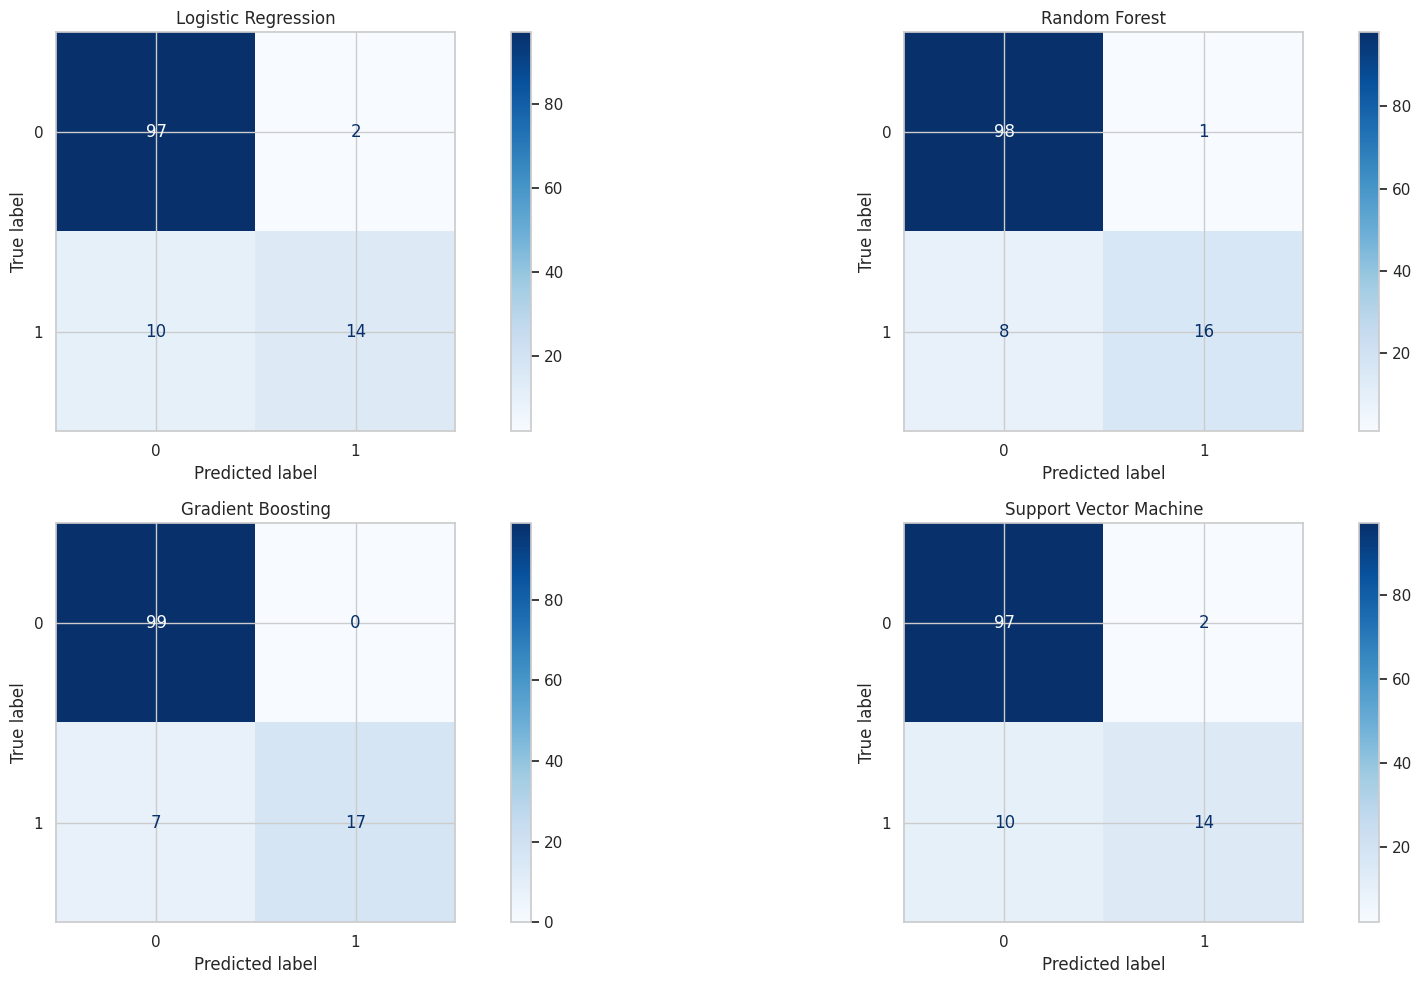

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# define the models and their names
models = {
    'Logistic Regression': log_reg_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'Support Vector Machine': svm_model
}

# create a subplot grid with 2 rows and 2 columns
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

# iterate over the models and plot the confusion matrix in the corresponding subplot
for i, (name, model) in enumerate(models.items()):
    row = i // 2
    col = i % 2
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues', ax=axs[row, col])
    disp.ax_.set_title(name)

plt.tight_layout()
plt.show()


Sorting models by accuracy and plotting them in a Ascending order on bar chart

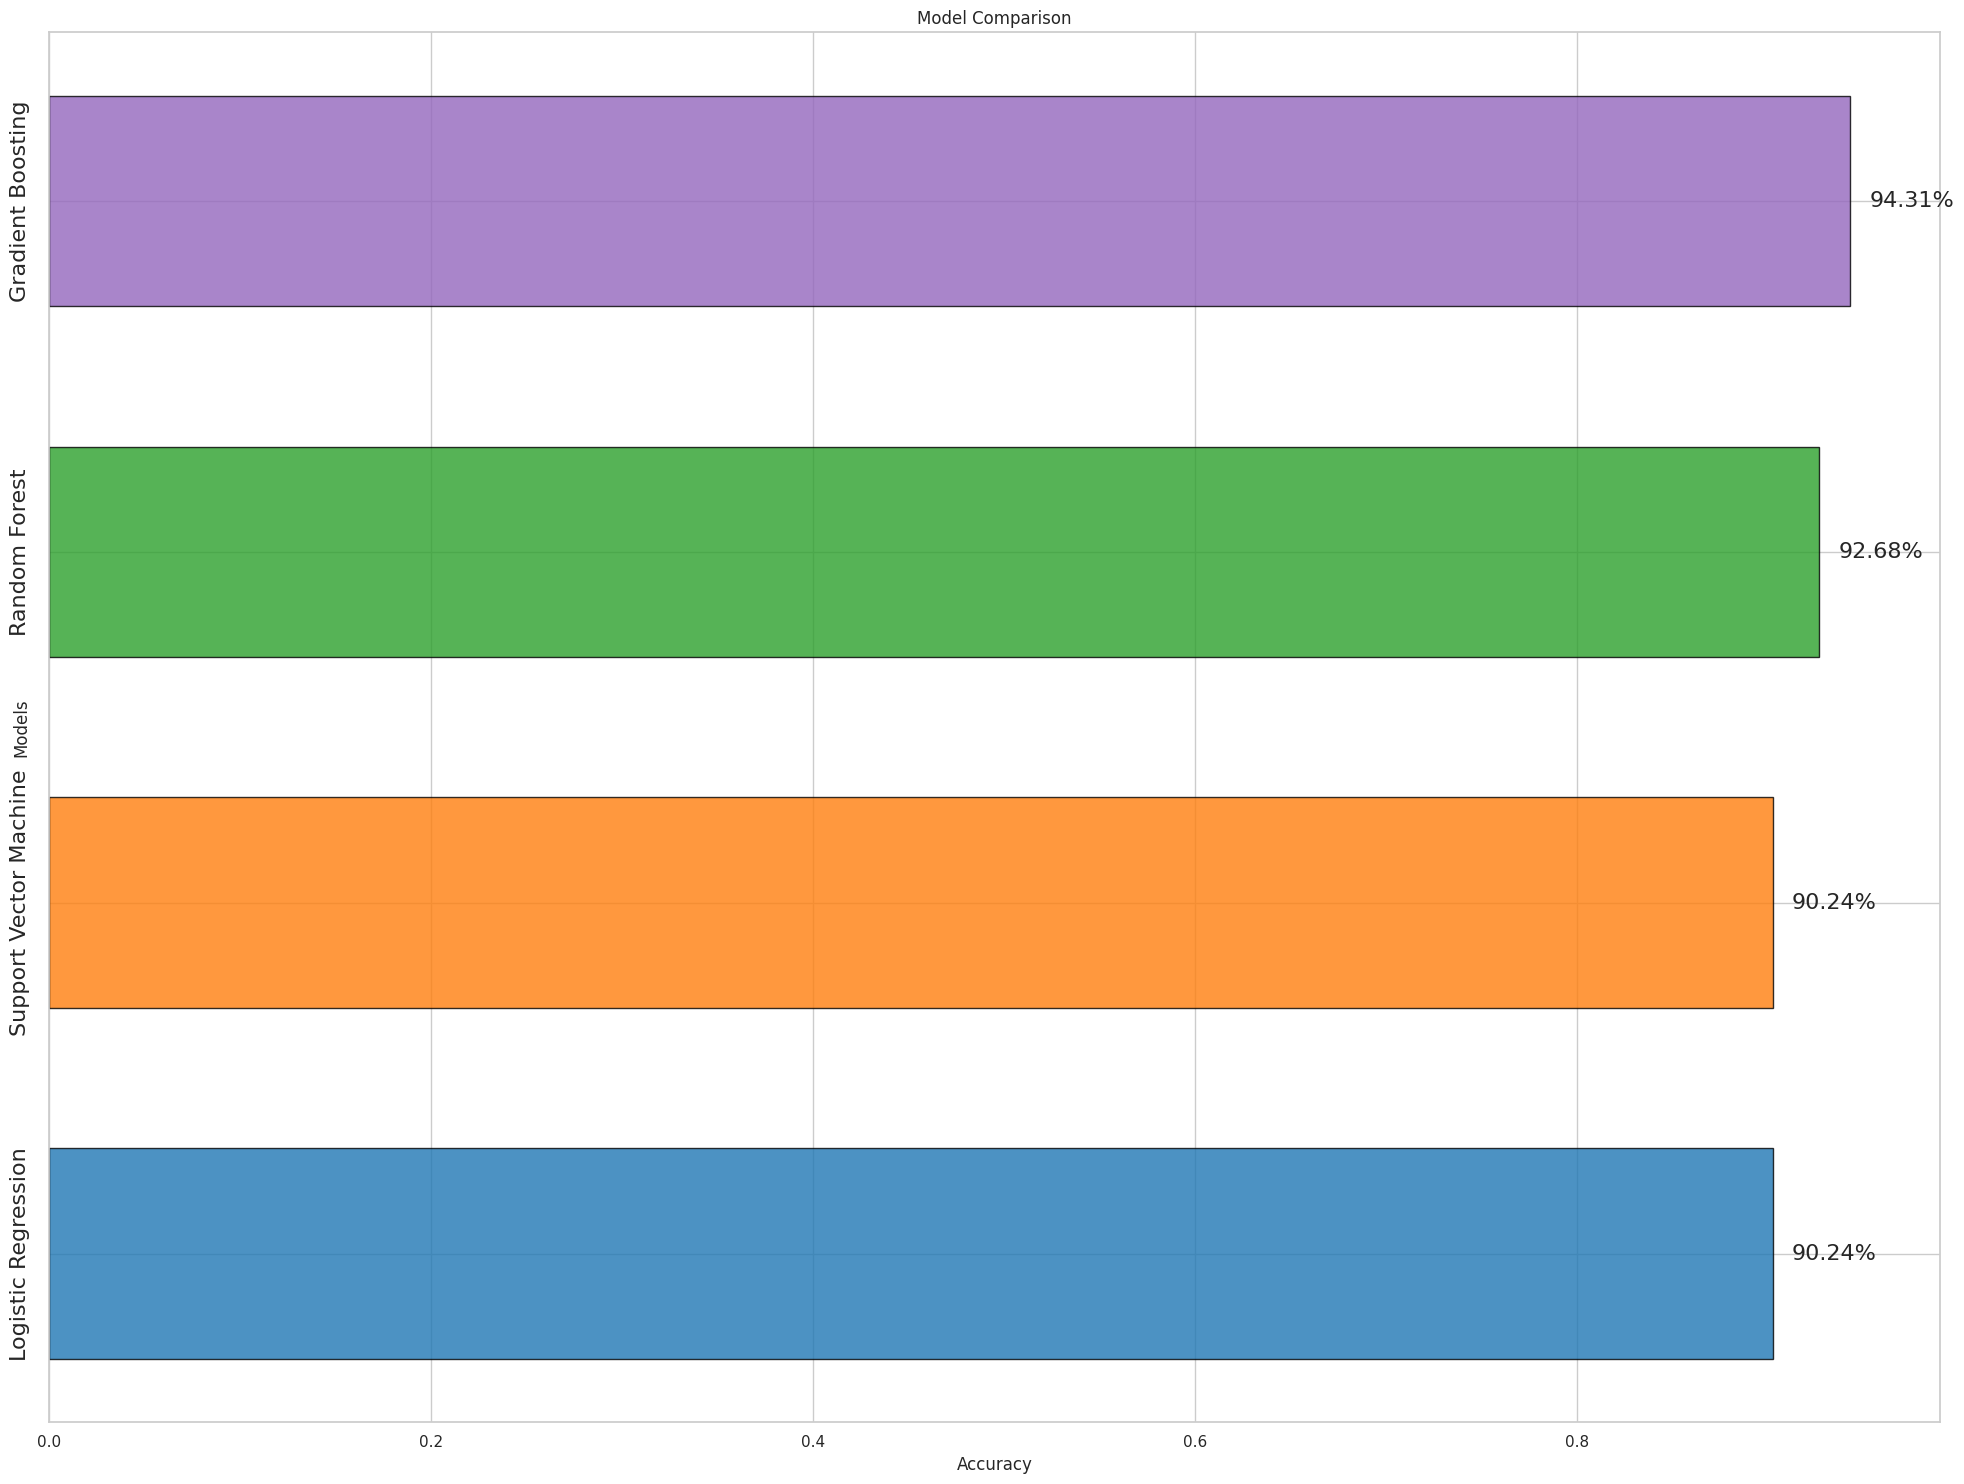

In [72]:
import matplotlib.pyplot as plt

# Sort accuracies in descending order
accuracies.sort(key=lambda x: x[1], reverse=False)

# Extract model names and accuracies
names, values = zip(*accuracies)

# Set color scheme
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple', 'tab:red']

# Create bar chart
fig, ax = plt.subplots(figsize=(20, 15))
ax.barh(range(len(names)), values, color=colors, edgecolor='black', height=0.6, alpha=0.8, capsize=5, tick_label='')

# Add labels to the bars
for i, (name, acc) in enumerate(zip(names, values)):
    ax.text(acc + 0.01, i, f"{acc:.2%}", ha='left', va='center', fontsize=16)
    ax.text(-0.01, i, name, ha='right', va='center', fontsize=16, rotation=90)

# Set axis labels and title
ax.set_xlabel('Accuracy')
ax.set_ylabel('Models')
ax.set_title('Model Comparison')


# Adjust layout and save plot
plt.subplots_adjust(left=0.3)
plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300)
plt.show()


Fitting the best model with the highest score on training data

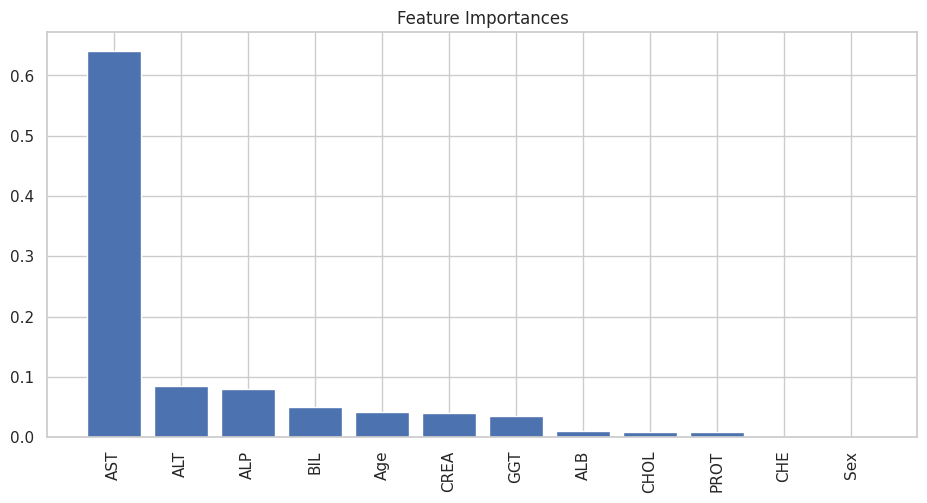

In [73]:
import matplotlib.pyplot as plt

# fit the model
gb_model.fit(X_train, y_train)

# get feature importances
importances = gb_model.feature_importances_

# get feature names
feature_names = X.columns

# sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# plot feature importances
plt.figure(figsize=(10,5))
plt.title("Feature Importances")
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), feature_names[indices], rotation='vertical')
plt.show()


Predictive System

In [74]:
input_data = (32,	0,	-0.531250,	-0.538899,	-0.918919,	-0.336283,	0.033898,	-0.500942,	-1.449477,	1.380952,	-0.457143,	-0.524590)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = gb_model.predict(input_data_reshaped)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Hepatitis C")

else:
  print("The Person has Hepatitis C")


[0]
The Person does not have Hepatitis C


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [75]:
import pickle

In [76]:
filename = 'hepatitis_model.sav'
pickle.dump(gb_model, open(filename, 'wb'))

# loading the model

loaded_model = pickle.load(open('hepatitis_model.sav', 'rb'))